In [1]:
import json
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")


###################################################################################################
                                                                                                  #
from rhoova.Client import *                                                                       #   
#Register and get api key from https://app.rhoova.com/ for ClientConfig("api key", "api secret")  #
config = ClientConfig("", "")                                                                     #
api = Api(config)                                                                                 # 
                                                                                                  #
###################################################################################################



directory = os.path.normpath(os.getcwd() + os.sep + os.pardir )
datadirectory=directory+"/data/yielddata.csv"


yielddata = pd.read_csv(datadirectory)
yielddata = yielddata.replace(np.nan, '', regex=True) 

mdirectory = os.path.normpath(os.getcwd() + os.sep + os.pardir )
mdatadirectory=mdirectory+"/data/marketdata.csv"

marketdata = pd.read_csv(mdatadirectory)
marketdata = marketdata.replace(np.nan, '', regex=True) 


In [2]:
fixedRateBondDefinition={}
fixedRateBondDefinition["issueDate"]="2015-03-15"
fixedRateBondDefinition["maturityDate"]="2026-06-04"
fixedRateBondDefinition["frequency"]="Semiannual"
fixedRateBondDefinition["coupon"]=0.0085
fixedRateBondDefinition["calendar"]="UnitedStates"
fixedRateBondDefinition["currency"]="TRY"
fixedRateBondDefinition["dateGeneration"]="Backward"
fixedRateBondDefinition["dayCounter"]="Actual360"
fixedRateBondDefinition["businessDayConvention"]="ModifiedFollowing"
fixedRateBondDefinition["maturityDateConvention"]="ModifiedFollowing"
fixedRateBondDefinition["redemption"]=100
fixedRateBondDefinition["endOfMonth"]=True
fixedRateBondDefinition

{'issueDate': '2015-03-15',
 'maturityDate': '2026-06-04',
 'frequency': 'Semiannual',
 'coupon': 0.0085,
 'calendar': 'UnitedStates',
 'currency': 'TRY',
 'dateGeneration': 'Backward',
 'dayCounter': 'Actual360',
 'businessDayConvention': 'ModifiedFollowing',
 'maturityDateConvention': 'ModifiedFollowing',
 'redemption': 100,
 'endOfMonth': True}

In [3]:
instruments={}
depo={}
irs={}

depo["businessDayConvention"]="Following"     # if it is null, default value is used
depo["dayCounter"]="Actual360"                # if it is null, default value is used

irs["businessDayConvention"]="Following"      # if it is null, default value is used 
irs["dayCounter"]="Actual360"                 # if it is null, default value is used 
irs["frequency"]="Semiannual"               

instruments["DEPO"]=depo
instruments["IRS"]=irs

instruments

{'DEPO': {'businessDayConvention': 'Following', 'dayCounter': 'Actual360'},
 'IRS': {'businessDayConvention': 'Following',
  'dayCounter': 'Actual360',
  'frequency': 'Semiannual'}}

In [4]:
# Fix parameters for building yield curve
yieldcurveconfig={
      "name": "TRYZC",
      "settlementDays": 2,
      "intpMethod": "LINEAR",
      "currency": "TRY",
      "calendar": "Turkey",
      "dayCounter": "Actual360",
      "period": "6M",
      "instruments": instruments

    }
yieldcurveconfig

{'name': 'TRYZC',
 'settlementDays': 2,
 'intpMethod': 'LINEAR',
 'currency': 'TRY',
 'calendar': 'Turkey',
 'dayCounter': 'Actual360',
 'period': '6M',
 'instruments': {'DEPO': {'businessDayConvention': 'Following',
   'dayCounter': 'Actual360'},
  'IRS': {'businessDayConvention': 'Following',
   'dayCounter': 'Actual360',
   'frequency': 'Semiannual'}}}

In [5]:
riskdata = {
  "id": "PORTFOLIO1",
  "name": "PORTFOLIO 1",
  "method": "risk_factors",
  "forRisk": True,
  "valuationDate": "2021-01-28",
  "valuationCurrency": "TRY",
  "riskMethod": "HISTORICAL",
  "horizon": 252,
  "confidenceInterval": 0.99,
  "returnType": None,
  "trend": False,
  "calendar": "Turkey",
  "timeBucket": ["0D","1D","1W","2W","3W","1M","2M","3M","6M","9M","1Y","2Y","3Y","4Y",
                "5Y","6Y","7Y","8Y","9Y","10Y","12Y","15Y","20Y","25Y","30Y","40Y","50Y"],
  "fillNa": "BACKWARD",
  "maxFillNaDays": 5,
  "tasks": [
    {
      "trade_id": "FRB1000",
      "calculation_type": "fixed_rate_bond",
      "notional": 1000000,
      "settlementDate": "2021-02-01",
      "buySell": "Sell",
      "discountCurve": "TRYZC",
      "fixedRateBondDefinition": fixedRateBondDefinition
    },
  ],
  "curves": [yieldcurveconfig],
  "yieldData": yielddata.to_dict('r'),
  "marketData":marketdata.to_dict('r'),
}

In [6]:
try:
    rfresult = api.createTask(CalculationType.PORTFOLIO, riskdata, True)
    if(rfresult["result"]):
      result=json.loads(rfresult["result"])
    else:
      print(rfresult["result"])
except RhoovaError as e:
    e.printPretty()

In [7]:
pd.DataFrame(result)

,TRYZC0D,TRYZC1D,TRYZC1W,TRYZC2W,TRYZC3W,TRYZC1M,TRYZC2M,TRYZC3M,TRYZC6M,TRYZC9M,...,TRYZC8Y,TRYZC9Y,TRYZC10Y,TRYZC12Y,TRYZC15Y,TRYZC20Y,TRYZC25Y,TRYZC30Y,TRYZC40Y,TRYZC50Y
2021-01-28,0.001208,0.001208,0.001208,0.001208,0.001208,0.001208,0.001585,0.002114,0.002275,0.002693,...,0.008832,0.009861,0.010747,0.012139,0.013624,0.014935,0.015574,0.015776,0.016079,0.016262
2021-01-27,0.001225,0.001225,0.001225,0.001225,0.001225,0.001225,0.001576,0.002184,0.002344,0.002716,...,0.008982,0.010019,0.010860,0.012316,0.013793,0.015146,0.015739,0.015972,0.016320,0.016529
2021-01-26,0.001275,0.001275,0.001275,0.001275,0.001275,0.001275,0.001583,0.002128,0.002329,0.002723,...,0.008822,0.009885,0.010811,0.012258,0.013726,0.015063,0.015650,0.015965,0.016438,0.016721
2021-01-25,0.001248,0.001248,0.001248,0.001248,0.001248,0.001248,0.001604,0.002152,0.002359,0.002738,...,0.009299,0.010343,0.011274,0.012763,0.014248,0.015616,0.016219,0.016513,0.016956,0.017221
2021-01-22,0.001300,0.001300,0.001300,0.001300,0.001300,0.001300,0.001655,0.002177,0.002344,0.002746,...,0.009252,0.010331,0.011346,0.012727,0.014271,0.015714,0.016277,0.016541,0.016938,0.017175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-03,0.016608,0.016608,0.016608,0.016608,0.016608,0.016608,0.017285,0.017473,0.017376,0.017639,...,0.013914,0.014186,0.014523,0.015107,0.015767,0.016456,0.016698,0.016758,0.016847,0.016900
2020-01-31,0.016539,0.016539,0.016539,0.016539,0.016539,0.016539,0.017387,0.017594,0.017556,0.017803,...,0.014633,0.014980,0.015243,0.015802,0.016436,0.017072,0.017328,0.017294,0.017242,0.017210
2020-01-30,0.016442,0.016442,0.016442,0.016442,0.016442,0.016442,0.017598,0.017731,0.017713,0.018007,...,0.014741,0.015088,0.015405,0.015910,0.016511,0.017125,0.017335,0.017391,0.017475,0.017525
2020-01-29,0.016489,0.016489,0.016489,0.016489,0.016489,0.016489,0.017614,0.017656,0.017632,0.017892,...,0.015307,0.015633,0.015918,0.016448,0.017098,0.017700,0.017909,0.017907,0.017904,0.017902


In [8]:
riskdata["returnType"]="ABSOLUTE"

In [9]:
try:
    rfresult = api.createTask(CalculationType.PORTFOLIO, riskdata, True)
    if(rfresult["result"]):
      result=json.loads(rfresult["result"])
    else:
      print(rfresult["result"])
except RhoovaError as e:
    e.printPretty()

In [10]:
pd.DataFrame(result)

,TRYZC0D,TRYZC1D,TRYZC1W,TRYZC2W,TRYZC3W,TRYZC1M,TRYZC2M,TRYZC3M,TRYZC6M,TRYZC9M,...,TRYZC8Y,TRYZC9Y,TRYZC10Y,TRYZC12Y,TRYZC15Y,TRYZC20Y,TRYZC25Y,TRYZC30Y,TRYZC40Y,TRYZC50Y
2021-01-28,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,0.001594,0.002044,0.002206,0.002669,...,0.008682,0.009702,0.010633,0.011963,0.013455,0.014724,0.015408,0.015580,0.015839,0.015994
2021-01-27,0.001158,0.001158,0.001158,0.001158,0.001158,0.001158,0.001578,0.002170,0.002290,0.002686,...,0.008992,0.009996,0.010796,0.012198,0.013691,0.015018,0.015663,0.015783,0.015962,0.016069
2021-01-26,0.001235,0.001235,0.001235,0.001235,0.001235,0.001235,0.001564,0.002090,0.002245,0.002678,...,0.008356,0.009402,0.010284,0.011635,0.013101,0.014383,0.015004,0.015227,0.015561,0.015762
2021-01-25,0.001156,0.001156,0.001156,0.001156,0.001156,0.001156,0.001534,0.002089,0.002290,0.002685,...,0.008879,0.009873,0.010675,0.012175,0.013601,0.014837,0.015516,0.015748,0.016097,0.016307
2021-01-22,0.001223,0.001223,0.001223,0.001223,0.001223,0.001223,0.001546,0.002068,0.002241,0.002668,...,0.008968,0.010028,0.011025,0.012350,0.013936,0.015336,0.015935,0.016157,0.016490,0.016690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-03,0.001277,0.001277,0.001277,0.001277,0.001277,0.001277,0.001483,0.001993,0.002095,0.002529,...,0.008113,0.009067,0.010027,0.011445,0.012954,0.014320,0.014943,0.015240,0.015685,0.015952
2020-01-31,0.001305,0.001305,0.001305,0.001305,0.001305,0.001305,0.001374,0.001977,0.002117,0.002489,...,0.008724,0.009752,0.010585,0.012032,0.013549,0.014882,0.015567,0.015679,0.015846,0.015946
2020-01-30,0.001161,0.001161,0.001161,0.001161,0.001161,0.001161,0.001569,0.002190,0.002356,0.002808,...,0.008267,0.009316,0.010234,0.011601,0.013037,0.014360,0.014999,0.015259,0.015651,0.015885
2020-01-29,0.001216,0.001216,0.001216,0.001216,0.001216,0.001216,0.001504,0.002065,0.002153,0.002614,...,0.009273,0.010355,0.011225,0.012561,0.014099,0.015382,0.015996,0.016306,0.016771,0.017050


In [11]:
riskdata["returnType"]="RELATIVE"

In [12]:
try:
    rfresult = api.createTask(CalculationType.PORTFOLIO, riskdata, True)
    if(rfresult["result"]):
      result=json.loads(rfresult["result"])
    else:
      print(rfresult["result"])
except RhoovaError as e:
    e.printPretty()

In [13]:
pd.DataFrame(result)

,TRYZC0D,TRYZC1D,TRYZC1W,TRYZC2W,TRYZC3W,TRYZC1M,TRYZC2M,TRYZC3M,TRYZC6M,TRYZC9M,...,TRYZC8Y,TRYZC9Y,TRYZC10Y,TRYZC12Y,TRYZC15Y,TRYZC20Y,TRYZC25Y,TRYZC30Y,TRYZC40Y,TRYZC50Y
2021-01-28,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,0.001594,0.002047,0.002208,0.002669,...,0.008685,0.009705,0.010634,0.011965,0.013457,0.014727,0.015409,0.015582,0.015842,0.015998
2021-01-27,0.001161,0.001161,0.001161,0.001161,0.001161,0.001161,0.001578,0.002170,0.002289,0.002686,...,0.008992,0.009995,0.010796,0.012197,0.013691,0.015017,0.015663,0.015783,0.015965,0.016075
2021-01-26,0.001234,0.001234,0.001234,0.001234,0.001234,0.001234,0.001564,0.002091,0.002246,0.002678,...,0.008380,0.009423,0.010305,0.011659,0.013124,0.014407,0.015027,0.015252,0.015588,0.015790
2021-01-25,0.001160,0.001160,0.001160,0.001160,0.001160,0.001160,0.001536,0.002090,0.002289,0.002685,...,0.008877,0.009873,0.010678,0.012173,0.013602,0.014842,0.015518,0.015750,0.016097,0.016305
2021-01-22,0.001222,0.001222,0.001222,0.001222,0.001222,0.001222,0.001548,0.002071,0.002242,0.002669,...,0.008963,0.010023,0.011017,0.012344,0.013928,0.015326,0.015927,0.016148,0.016479,0.016677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-03,0.001213,0.001213,0.001213,0.001213,0.001213,0.001213,0.001575,0.002100,0.002251,0.002668,...,0.008398,0.009338,0.010239,0.011606,0.013069,0.014397,0.015007,0.015287,0.015711,0.015969
2020-01-31,0.001215,0.001215,0.001215,0.001215,0.001215,0.001215,0.001566,0.002098,0.002254,0.002662,...,0.008767,0.009790,0.010634,0.012057,0.013562,0.014889,0.015568,0.015688,0.015865,0.015969
2020-01-30,0.001204,0.001204,0.001204,0.001204,0.001204,0.001204,0.001583,0.002123,0.002285,0.002710,...,0.008506,0.009517,0.010401,0.011742,0.013157,0.014450,0.015074,0.015321,0.015694,0.015920
2020-01-29,0.001209,0.001209,0.001209,0.001209,0.001209,0.001209,0.001578,0.002109,0.002259,0.002681,...,0.009094,0.010183,0.011079,0.012459,0.014013,0.015322,0.015950,0.016257,0.016725,0.017011


In [14]:
riskdata["returnType"]="LOGNORMAL"

In [15]:
try:
    rfresult = api.createTask(CalculationType.PORTFOLIO, riskdata, True)
    if(rfresult["result"]):
      result=json.loads(rfresult["result"])
    else:
      print(rfresult["result"])
except RhoovaError as e:
    e.printPretty()

In [16]:
pd.DataFrame(result)

,TRYZC0D,TRYZC1D,TRYZC1W,TRYZC2W,TRYZC3W,TRYZC1M,TRYZC2M,TRYZC3M,TRYZC6M,TRYZC9M,...,TRYZC8Y,TRYZC9Y,TRYZC10Y,TRYZC12Y,TRYZC15Y,TRYZC20Y,TRYZC25Y,TRYZC30Y,TRYZC40Y,TRYZC50Y
2021-01-28,0.001191,0.001191,0.001191,0.001191,0.001191,0.001191,0.001594,0.002047,0.002208,0.002669,...,0.008685,0.009705,0.010634,0.011965,0.013457,0.014727,0.015409,0.015582,0.015842,0.015998
2021-01-27,0.001161,0.001161,0.001161,0.001161,0.001161,0.001161,0.001578,0.002170,0.002289,0.002686,...,0.008992,0.009995,0.010796,0.012197,0.013691,0.015017,0.015663,0.015783,0.015965,0.016075
2021-01-26,0.001234,0.001234,0.001234,0.001234,0.001234,0.001234,0.001564,0.002091,0.002246,0.002678,...,0.008380,0.009423,0.010305,0.011659,0.013124,0.014407,0.015027,0.015252,0.015588,0.015790
2021-01-25,0.001160,0.001160,0.001160,0.001160,0.001160,0.001160,0.001536,0.002090,0.002289,0.002685,...,0.008877,0.009873,0.010678,0.012173,0.013602,0.014842,0.015518,0.015750,0.016097,0.016305
2021-01-22,0.001222,0.001222,0.001222,0.001222,0.001222,0.001222,0.001548,0.002071,0.002242,0.002669,...,0.008963,0.010023,0.011017,0.012344,0.013928,0.015326,0.015927,0.016148,0.016479,0.016677
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-03,0.001213,0.001213,0.001213,0.001213,0.001213,0.001213,0.001575,0.002100,0.002251,0.002668,...,0.008398,0.009338,0.010239,0.011606,0.013069,0.014397,0.015007,0.015287,0.015711,0.015969
2020-01-31,0.001215,0.001215,0.001215,0.001215,0.001215,0.001215,0.001566,0.002098,0.002254,0.002662,...,0.008767,0.009790,0.010634,0.012057,0.013562,0.014889,0.015568,0.015688,0.015865,0.015969
2020-01-30,0.001204,0.001204,0.001204,0.001204,0.001204,0.001204,0.001583,0.002123,0.002285,0.002710,...,0.008506,0.009517,0.010401,0.011742,0.013157,0.014450,0.015074,0.015321,0.015694,0.015920
2020-01-29,0.001209,0.001209,0.001209,0.001209,0.001209,0.001209,0.001578,0.002109,0.002259,0.002681,...,0.009094,0.010183,0.011079,0.012459,0.014013,0.015322,0.015950,0.016257,0.016725,0.017011


In [17]:
riskdata["trend"]=True

In [18]:
try:
    rfresult = api.createTask(CalculationType.PORTFOLIO, riskdata, True)
    if(rfresult["result"]):
      result=json.loads(rfresult["result"])
    else:
      print(rfresult["result"])
except RhoovaError as e:
    e.printPretty()

In [19]:
pd.DataFrame(result)

,TRYZC0D,TRYZC1D,TRYZC1W,TRYZC2W,TRYZC3W,TRYZC1M,TRYZC2M,TRYZC3M,TRYZC6M,TRYZC9M,...,TRYZC8Y,TRYZC9Y,TRYZC10Y,TRYZC12Y,TRYZC15Y,TRYZC20Y,TRYZC25Y,TRYZC30Y,TRYZC40Y,TRYZC50Y
2021-01-28,0.001204,0.001204,0.001204,0.001204,0.001204,0.001204,0.001609,0.002064,0.002226,0.002689,...,0.008703,0.009721,0.010650,0.011978,0.013468,0.014736,0.015416,0.015588,0.015847,0.016002
2021-01-27,0.001173,0.001173,0.001173,0.001173,0.001173,0.001173,0.001593,0.002188,0.002308,0.002706,...,0.009011,0.010012,0.010811,0.012211,0.013701,0.015026,0.015670,0.015789,0.015969,0.016078
2021-01-26,0.001247,0.001247,0.001247,0.001247,0.001247,0.001247,0.001579,0.002109,0.002264,0.002698,...,0.008397,0.009439,0.010320,0.011672,0.013134,0.014415,0.015034,0.015258,0.015592,0.015793
2021-01-25,0.001172,0.001172,0.001172,0.001172,0.001172,0.001172,0.001551,0.002108,0.002308,0.002705,...,0.008895,0.009889,0.010694,0.012187,0.013613,0.014850,0.015525,0.015756,0.016101,0.016308
2021-01-22,0.001235,0.001235,0.001235,0.001235,0.001235,0.001235,0.001563,0.002088,0.002260,0.002689,...,0.008982,0.010040,0.011032,0.012358,0.013939,0.015335,0.015935,0.016154,0.016483,0.016681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-03,0.001226,0.001226,0.001226,0.001226,0.001226,0.001226,0.001591,0.002118,0.002270,0.002688,...,0.008415,0.009354,0.010254,0.011618,0.013079,0.014405,0.015014,0.015293,0.015716,0.015972
2020-01-31,0.001228,0.001228,0.001228,0.001228,0.001228,0.001228,0.001581,0.002116,0.002273,0.002682,...,0.008785,0.009807,0.010649,0.012070,0.013573,0.014897,0.015575,0.015694,0.015869,0.015972
2020-01-30,0.001217,0.001217,0.001217,0.001217,0.001217,0.001217,0.001599,0.002141,0.002304,0.002730,...,0.008523,0.009533,0.010415,0.011755,0.013167,0.014458,0.015081,0.015327,0.015698,0.015923
2020-01-29,0.001221,0.001221,0.001221,0.001221,0.001221,0.001221,0.001593,0.002126,0.002278,0.002701,...,0.009113,0.010200,0.011095,0.012473,0.014024,0.015331,0.015957,0.016263,0.016730,0.017014


In [20]:
riskdata["timeBucket"]=["0D","1D","2D","3D","1W","2W","3W","1M","2M","3M","6M","9M","1Y","2Y","3Y","4Y",
                        "5Y","6Y","7Y","8Y","9Y","10Y","12Y","15Y","20Y","25Y","30Y","40Y","50Y","160Y"]

In [21]:
try:
    rfresult = api.createTask(CalculationType.PORTFOLIO, riskdata, True)
    if(rfresult["result"]):
      result=json.loads(rfresult["result"])
    else:
      print(rfresult["result"])
except RhoovaError as e:
    e.printPretty()

In [22]:
pd.DataFrame(result)

,TRYZC0D,TRYZC1D,TRYZC2D,TRYZC3D,TRYZC1W,TRYZC2W,TRYZC3W,TRYZC1M,TRYZC2M,TRYZC3M,...,TRYZC9Y,TRYZC10Y,TRYZC12Y,TRYZC15Y,TRYZC20Y,TRYZC25Y,TRYZC30Y,TRYZC40Y,TRYZC50Y,TRYZC160Y
2021-01-28,0.001204,0.001204,0.001204,0.001204,0.001204,0.001204,0.001204,0.001204,0.001609,0.002064,...,0.009721,0.010650,0.011978,0.013468,0.014736,0.015416,0.015588,0.015847,0.016002,0.016428
2021-01-27,0.001173,0.001173,0.001173,0.001173,0.001173,0.001173,0.001173,0.001173,0.001593,0.002188,...,0.010012,0.010811,0.012211,0.013701,0.015026,0.015670,0.015789,0.015969,0.016078,0.016382
2021-01-26,0.001247,0.001247,0.001247,0.001247,0.001247,0.001247,0.001247,0.001247,0.001579,0.002109,...,0.009439,0.010320,0.011672,0.013134,0.014415,0.015034,0.015258,0.015592,0.015793,0.016344
2021-01-25,0.001172,0.001172,0.001172,0.001172,0.001172,0.001172,0.001172,0.001172,0.001551,0.002108,...,0.009889,0.010694,0.012187,0.013613,0.014850,0.015525,0.015756,0.016101,0.016308,0.016876
2021-01-22,0.001235,0.001235,0.001235,0.001235,0.001235,0.001235,0.001235,0.001235,0.001563,0.002088,...,0.010040,0.011032,0.012358,0.013939,0.015335,0.015935,0.016154,0.016483,0.016681,0.017223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-03,0.001226,0.001226,0.001226,0.001226,0.001226,0.001226,0.001226,0.001226,0.001591,0.002118,...,0.009354,0.010254,0.011618,0.013079,0.014405,0.015014,0.015293,0.015716,0.015972,0.016688
2020-01-31,0.001228,0.001228,0.001228,0.001228,0.001228,0.001228,0.001228,0.001228,0.001581,0.002116,...,0.009807,0.010649,0.012070,0.013573,0.014897,0.015575,0.015694,0.015869,0.015972,0.016250
2020-01-30,0.001217,0.001217,0.001217,0.001217,0.001217,0.001217,0.001217,0.001217,0.001599,0.002141,...,0.009533,0.010415,0.011755,0.013167,0.014458,0.015081,0.015327,0.015698,0.015923,0.016545
2020-01-29,0.001221,0.001221,0.001221,0.001221,0.001221,0.001221,0.001221,0.001221,0.001593,0.002126,...,0.010200,0.011095,0.012473,0.014024,0.015331,0.015957,0.016263,0.016730,0.017014,0.017812


In [23]:
###################################################################################################################
###################################################################################################################
###################################################################################################################
###################################################################################################################
###################################################################################################################
###################################################################################################################
###################################################################################################################

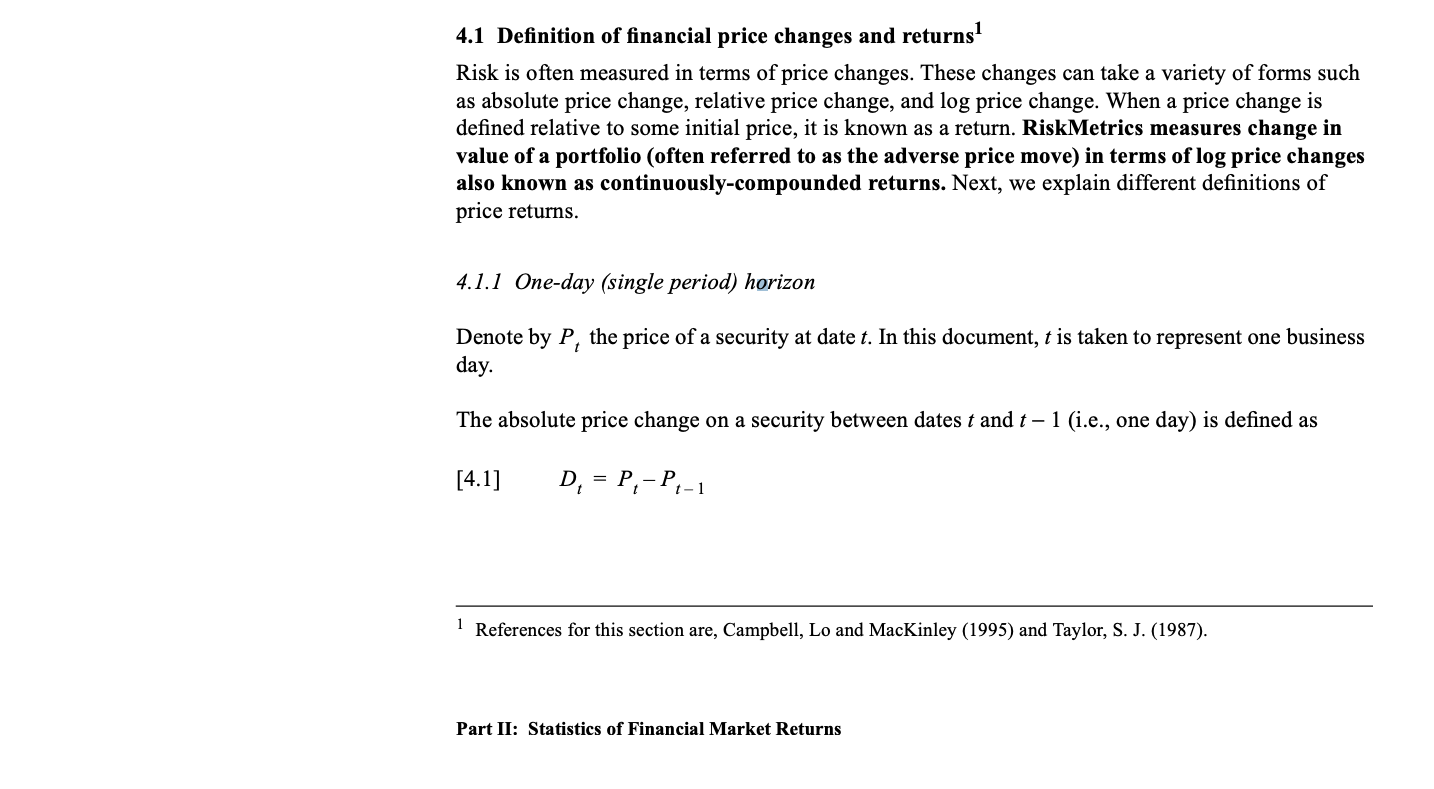

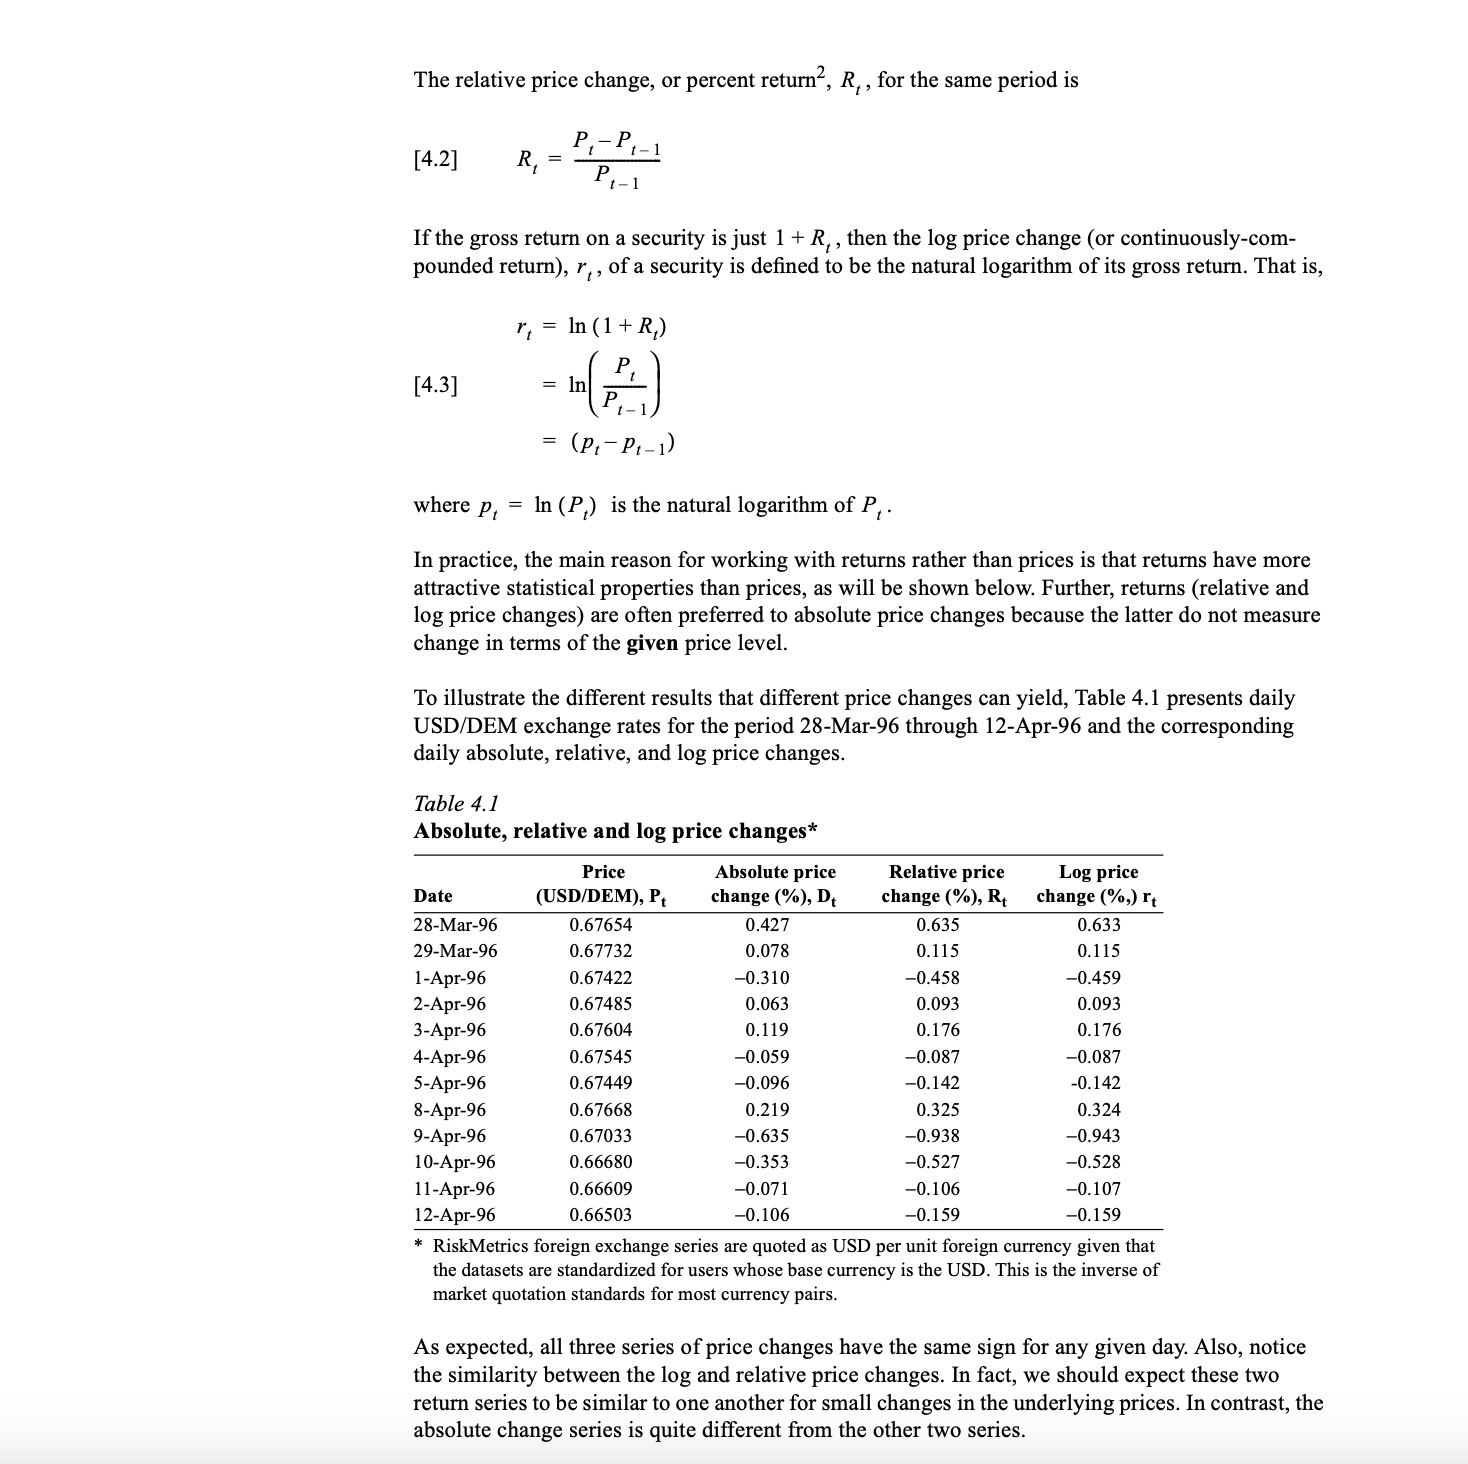

In [24]:
# https://www.msci.com/documents/10199/5915b101-4206-4ba0-aee2-3449d5c7e95a (Page 45)